In [192]:
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [288]:
target_moi = 5
n_barcodes = 96
n_cells = 10000

In [289]:
integration_list = []

for c in range(n_cells):
    n_integrations = np.random.poisson(target_moi)
    these_integrations = '_'.join([str(x) for x in sorted(np.unique(np.random.choice(range(n_barcodes),n_integrations)))])
    integration_list.append(these_integrations)

In [290]:
uniques,counts = np.unique(integration_list,return_counts=True)
uniques = uniques[np.argsort(counts)[::-1]]
counts = counts[np.argsort(counts)[::-1]]
n_unique_bcs = np.asarray([u.count('_')+1 if u != '' else 0 for u in uniques ])

In [291]:
len(uniques) ### THIS NUMBER IS CLOSE TO 1-(n_0+n_1+n_2), essentially indicating that if you filter to cells with 3 or more, you rarely get multiples

9613

/var/folders/9y/6d7h4kvn6f989_h_gypc_j_00000gn/T/ipykernel_33988/2501995742.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(counts[1:],kde=False,bins=bins)


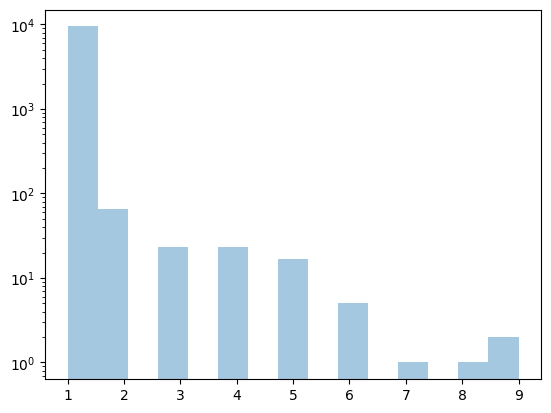

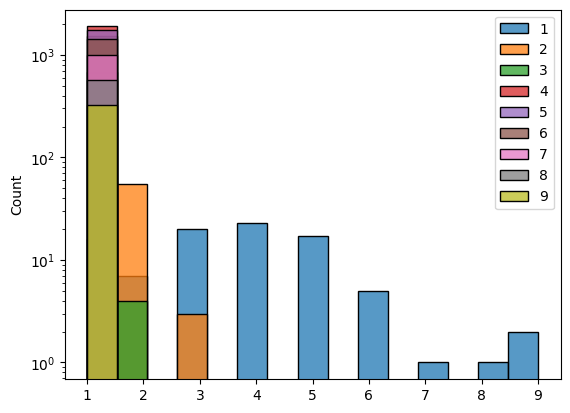

In [292]:
# bins = plt.hist(counts[1:])
bins = np.histogram_bin_edges(counts[1:],bins='auto')

sns.distplot(counts[1:],kde=False,bins=bins)
plt.yscale('log')

plt.figure()

for n_uni in range(1,10):
    
    ix = np.where(n_unique_bcs == n_uni)[0]
    
    sns.histplot(counts[ix],stat='count',bins=bins,label=n_uni)
plt.yscale('log')
plt.legend()

In [293]:
uniques[np.where(counts>5)[0]]

array(['', '65', '28', '37', '34', '59', '43', '88', '5', '78'],
      dtype='<U47')

/var/folders/9y/6d7h4kvn6f989_h_gypc_j_00000gn/T/ipykernel_33988/2901068890.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.random.poisson(target_moi,100000),kde=False)


<Axes: >

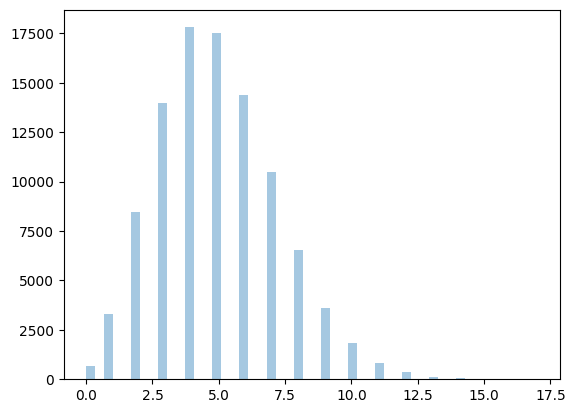

In [294]:
sns.distplot(np.random.poisson(target_moi,100000),kde=False)


<Axes: ylabel='Count'>

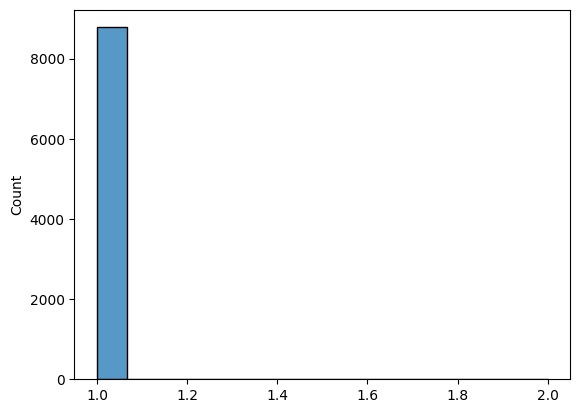

In [295]:
sns.histplot(counts[np.where(n_unique_bcs > 2)[0]])

In [296]:
uni_thresh = 2

sum(counts[np.where(n_unique_bcs > uni_thresh)[0]]>1)/len(counts[np.where(n_unique_bcs > uni_thresh)[0]])

sum(counts[np.where(n_unique_bcs > uni_thresh)[0]]>1)/len(counts[np.where(n_unique_bcs > uni_thresh)[0]])

0.00045521793558666213

In [297]:
sum(counts[np.where(n_unique_bcs > 2)[0]]>1)

4

In [298]:
## With MOI of 3 and 100,000 cells:
## Restricting to 2 or more unique gives ~90% chance of uniqueness
## Restricting to 3 or more unique gives ~97% chance of uniqueness

## What's the expected presence/absence distance -> how much does failing to detect a barcode contribute?